In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
models = pd.read_csv('../output_files/results.csv')

In this notebook, we examine the performance of different model types over time (i.e as the size of the training dataset grows). 

First, we identify the single model of each type that has the best precision at the 10% threshold, i.e. the single best-performing set of hyperparameters for decision trees, random forests, etc. We then track the performance of each of these models over time. The graph below plots the precision at 10% for each of those models over time.

In [3]:
models_to_run = ['RF', 'DT', 'LR', 'NB', 'KNN', 'BG', 'AB', 'GB', 'SVM']
data = pd.DataFrame()
for model in models_to_run:
    param = models[(models['model_type'] == model) & (models['threshold'] == 10)].sort_values(by='precision', ascending=False).iloc[0]['parameters']
    new_df = models[(models['model_type'] == model) & (models['parameters'] == param) & (models['threshold'] == 10)]
    data = pd.concat([data, new_df])

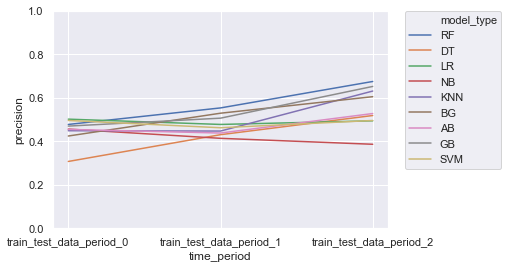

In [4]:
sns.lineplot(x="time_period", y="precision", hue="model_type", data=data, legend="brief")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We are also interested in tracking the overall performance of each model type over time. The graph below plots the highest precision at 10% for each model type (decision tree, random forest, etc) in each training/test time period.

In [5]:
models[(models['time_period'] == 'train_test_data_period_0') & (models['threshold'] == 10.0)].sort_values(by=['precision'], ascending=False)

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
409,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 10...",10.0,0.808259,0.568389,0.282691,0.377587
339,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 2,...",10.0,0.808614,0.562310,0.279667,0.373549
416,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 1...",10.0,0.808321,0.560790,0.278912,0.372539
367,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 5, ...",10.0,0.807201,0.560790,0.278912,0.372539
374,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",10.0,0.808574,0.559271,0.278156,0.371530
346,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",10.0,0.808647,0.559271,0.278156,0.371530
381,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 5...",10.0,0.808594,0.557751,0.277400,0.370520
276,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 5...",10.0,0.808403,0.556231,0.276644,0.369510
262,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 5, ...",10.0,0.807788,0.556231,0.276644,0.369510
311,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 1...",10.0,0.808170,0.556231,0.276644,0.369510


In [6]:
models_to_run = ['RF', 'DT', 'LR', 'NB', 'KNN', 'BG', 'AB', 'GB', 'SVM']
time = ['train_test_data_period_0', 'train_test_data_period_1', 'train_test_data_period_2']
df = pd.DataFrame()
for t in time:
    for model in models_to_run:
        result = models[(models['time_period'] == t) & (models['model_type'] == model) & (models['threshold'] == 10)].sort_values(by='precision', ascending=False).iloc[[0]]
        df = pd.concat([df, result])

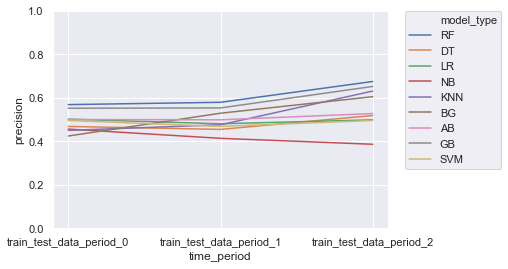

In [7]:
sns.lineplot(x="time_period", y="precision", hue="model_type", data=df, legend="brief")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)